## 1. Setup and Imports

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to path
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

from automl.pipeline import run_pipeline

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Imports successful!")

✅ Imports successful!


## 2. Load Image Dataset

We'll use the digits dataset (8x8 grayscale images of handwritten digits).

In [2]:
# Load digits dataset
digits = load_digits()

# Create DataFrame with flattened images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

df = pd.DataFrame(data)
df['target'] = digits.target

print(f"Dataset shape: {df.shape}")
print(f"Number of classes: {len(np.unique(digits.target))}")
print(f"Image dimensions: {digits.images[0].shape}")
print(f"\nTarget distribution:")
print(pd.Series(digits.target).value_counts().sort_index())

Dataset shape: (1797, 65)
Number of classes: 10
Image dimensions: (8, 8)

Target distribution:
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


## 3. Visualize Sample Images

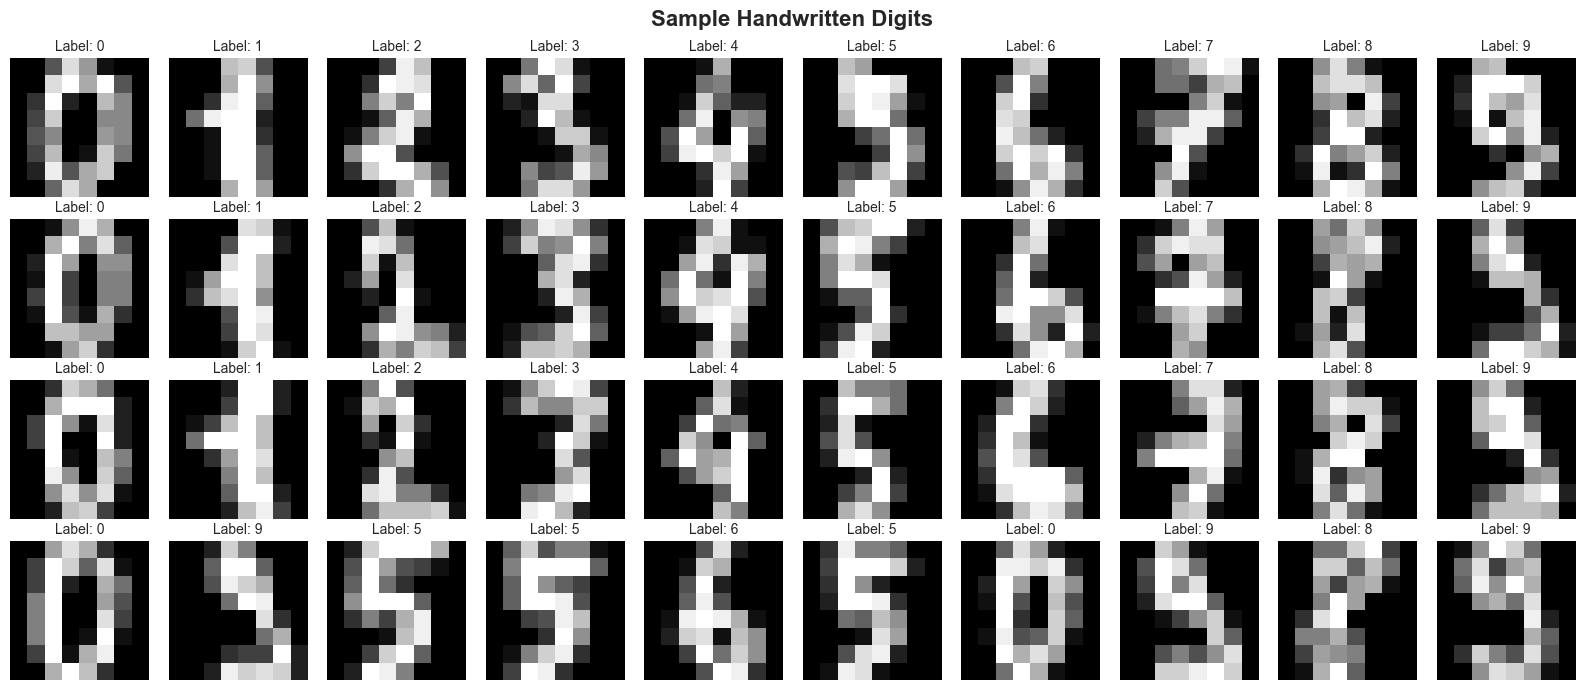

In [3]:
# Display sample images
fig, axes = plt.subplots(4, 10, figsize=(16, 7))
fig.suptitle('Sample Handwritten Digits', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    if i < len(digits.images):
        ax.imshow(digits.images[i], cmap='gray')
        ax.set_title(f'Label: {digits.target[i]}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

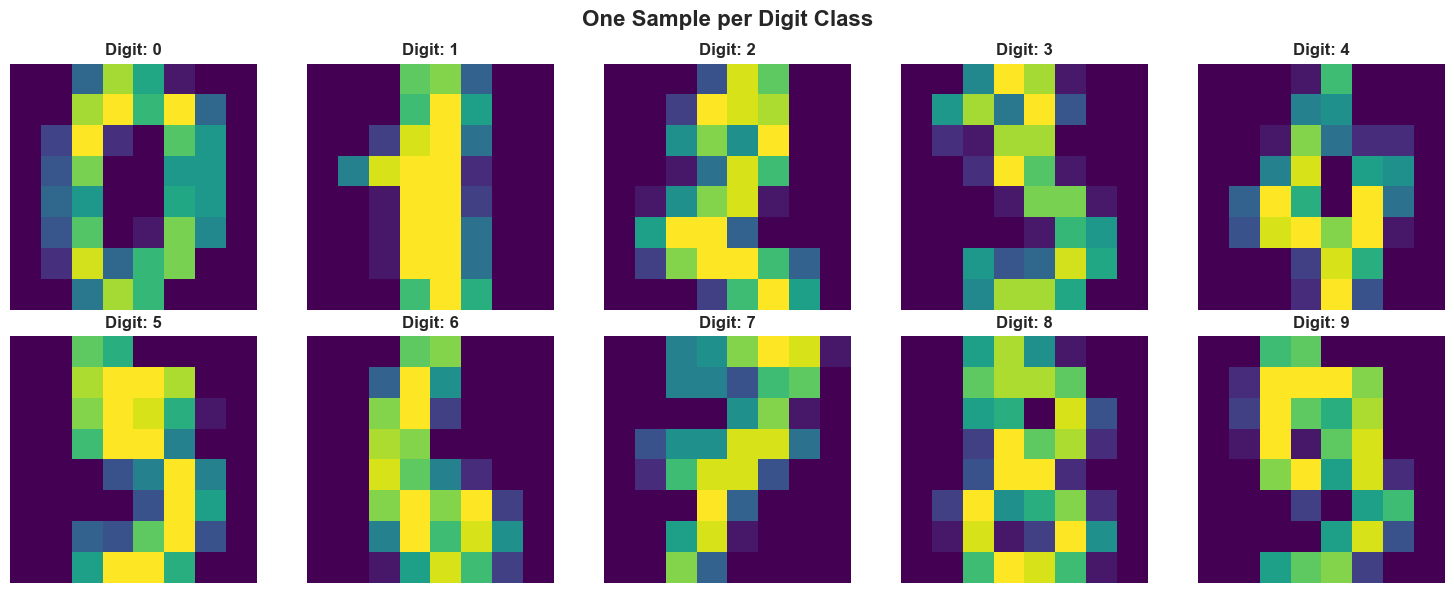

In [4]:
# Show one digit per class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('One Sample per Digit Class', fontsize=16, fontweight='bold')

for digit in range(10):
    idx = np.where(digits.target == digit)[0][0]
    ax = axes[digit // 5, digit % 5]
    ax.imshow(digits.images[idx], cmap='viridis')
    ax.set_title(f'Digit: {digit}', fontsize=12, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 4. Data Statistics

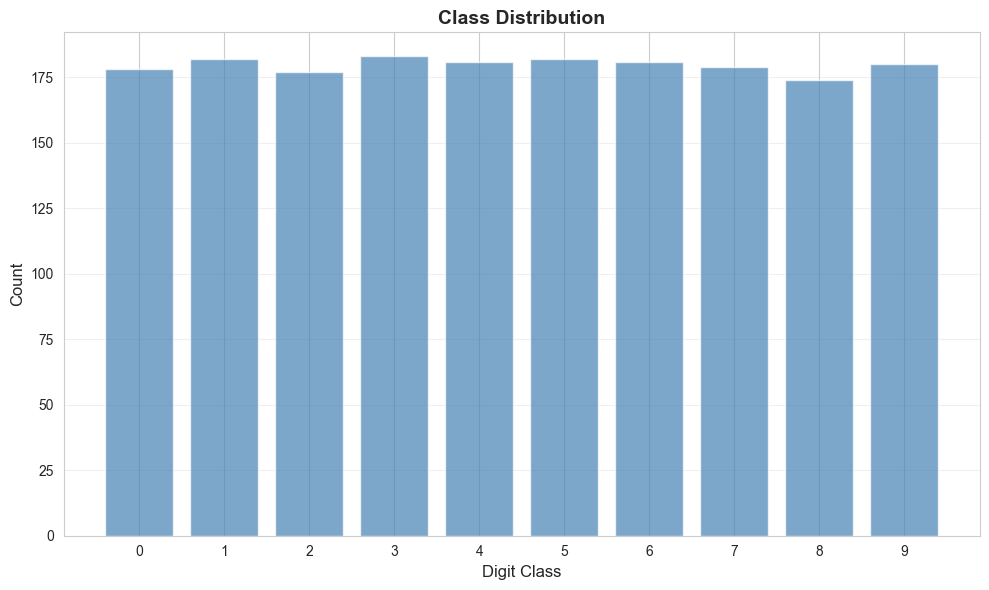

📊 Dataset Statistics:
Total samples: 1797
Features per image: 64 (8x8 pixels)
Pixel value range: [0.0, 16.0]


In [5]:
# Class distribution visualization
plt.figure(figsize=(10, 6))
class_counts = pd.Series(digits.target).value_counts().sort_index()
plt.bar(class_counts.index, class_counts.values, color='steelblue', alpha=0.7)
plt.xlabel('Digit Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Dataset Statistics:")
print(f"Total samples: {len(digits.target)}")
print(f"Features per image: {data.shape[1]} (8x8 pixels)")
print(f"Pixel value range: [{data.min()}, {data.max()}]")

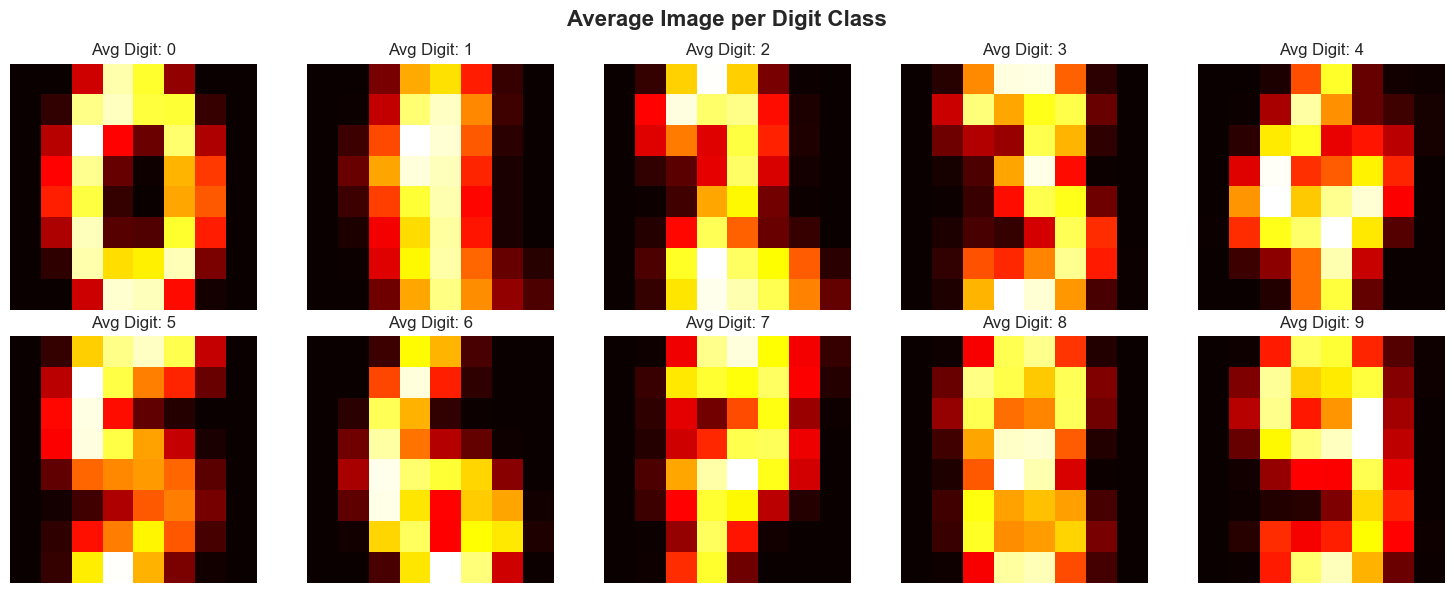

In [6]:
# Average image per class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Average Image per Digit Class', fontsize=16, fontweight='bold')

for digit in range(10):
    indices = np.where(digits.target == digit)[0]
    avg_image = np.mean(digits.images[indices], axis=0)
    
    ax = axes[digit // 5, digit % 5]
    ax.imshow(avg_image, cmap='hot')
    ax.set_title(f'Avg Digit: {digit}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

## 5. Run AutoML Pipeline

The pipeline will:
1. Detect data type (image/tabular)
2. Normalize pixel values
3. Train multiple classifiers
4. Evaluate performance

In [8]:
print("🚀 Running AutoML pipeline on image data...\n")

# Run pipeline
results = run_pipeline(
    dataset=df,
    target_column='target',
    task_type='classification',
    feature_selection_enabled=False,  # Keep all pixels
    hyperparameter_tuning_enabled=False  # Skip for speed
)

print("\n" + "="*70)
print("✅ Pipeline completed successfully!")
print("="*70)

2025-12-19 05:00:18,091 - automl.preprocessing - INFO - ======================================================================
2025-12-19 05:00:18,093 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 05:00:18,094 - automl.preprocessing - INFO - ======================================================================
2025-12-19 05:00:18,096 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 05:00:18,097 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 05:00:18,098 - automl.preprocessing - INFO - ======================================================================
2025-12-19 05:00:18,099 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 05:00:18,100 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...
2025-12-19 05:00:18,101 - automl.tabular_preprocessing - INFO - ===============================================

🚀 Running AutoML pipeline on image data...

==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...
Training baseline models...
Training tabular model: LogisticRegression
Training tabular model: DecisionTreeClassifier
Training tabular model: RandomForestClassifier
Training tabular model: SVC
Training tabular model: KNeighborsClassifier
Training tabular model: GradientBoostingClassifier
Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=0.9693, Accuracy=0.9694, Precision=0.9695
Model decision_tree: F1-weighted=0.8356, Accuracy=0.8361, Precision=0.8413
Model random_forest: F1-weighted=0.9720, Accuracy=0.9722, Precision=0.9728
Model svc: F1-weighted=0.9749, Accuracy=0.9750, Precision=0.9757
Model knn: F1-weighted=0.9580, Accuracy=0.9583, Precision=0.9

## 6. Analyze Results

In [ ]:
# Best model
best_info = results.get('best_model', {})
best_model_name = best_info.get('name') or best_info.get('model_name') or 'Unknown'
best_model_obj = best_info.get('object', best_info.get('model'))

print(f"🏆 Best Model: {best_model_name}")

if best_model_obj is not None:
    print("\nModel Details:")
    print(best_model_obj)
else:
    print("\nℹ️ Model object not available in results.")

KeyError: 'model'

In [10]:
# Model comparison
print("📈 Model Performance Comparison:\n")
evaluation_results = results['evaluation_results']

model_scores = []
for model_name, eval_data in evaluation_results.items():
    metrics = eval_data.get('metrics', {})
    model_scores.append({
        'Model': model_name,
        'Accuracy': metrics.get('accuracy', 0),
        'Precision': metrics.get('precision', 0),
        'Recall': metrics.get('recall', 0),
        'F1-Score': metrics.get('f1_score', 0)
    })

scores_df = pd.DataFrame(model_scores)
scores_df = scores_df.sort_values('Accuracy', ascending=False)
print(scores_df.to_string(index=False))

📈 Model Performance Comparison:

              Model  Accuracy  Precision  Recall  F1-Score
                svc  0.975000          0       0         0
      random_forest  0.972222          0       0         0
logistic_regression  0.969444          0       0         0
                knn  0.958333          0       0         0
  gradient_boosting  0.958333          0       0         0
      decision_tree  0.836111          0       0         0


## 7. Visualize Performance

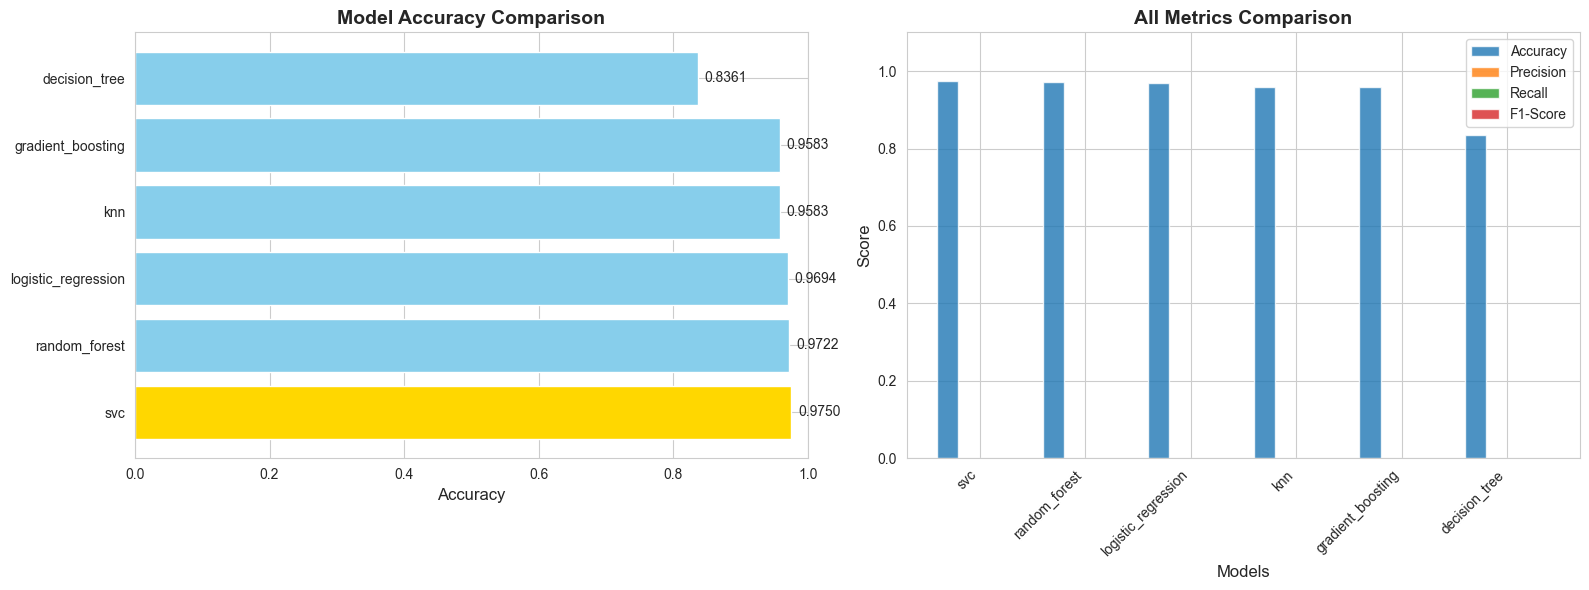

In [11]:
# Performance visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy comparison
ax1 = axes[0]
colors = ['gold' if model == best_model_name else 'skyblue' for model in scores_df['Model']]
ax1.barh(scores_df['Model'], scores_df['Accuracy'], color=colors)
ax1.set_xlabel('Accuracy', fontsize=12)
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlim([0, 1])
for i, v in enumerate(scores_df['Accuracy']):
    ax1.text(v + 0.01, i, f'{v:.4f}', va='center')

# All metrics
ax2 = axes[1]
x = np.arange(len(scores_df))
width = 0.2
ax2.bar(x - width*1.5, scores_df['Accuracy'], width, label='Accuracy', alpha=0.8)
ax2.bar(x - width*0.5, scores_df['Precision'], width, label='Precision', alpha=0.8)
ax2.bar(x + width*0.5, scores_df['Recall'], width, label='Recall', alpha=0.8)
ax2.bar(x + width*1.5, scores_df['F1-Score'], width, label='F1-Score', alpha=0.8)
ax2.set_xlabel('Models', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('All Metrics Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(scores_df['Model'], rotation=45, ha='right')
ax2.legend()
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

## 8. Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
best_eval = evaluation_results[best_model_name]
if 'y_true' in best_eval and 'y_pred' in best_eval:
    y_true = best_eval['y_true']
    y_pred = best_eval['y_pred']
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(10), 
                yticklabels=range(10))
    plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Classification report
    print("\n📋 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))

## 9. Sample Predictions Visualization

In [13]:
# Visualize predictions on test set
if 'y_true' in best_eval and 'y_pred' in best_eval:
    # Get test indices
    test_size = len(y_true)
    test_indices = list(range(len(digits.images) - test_size, len(digits.images)))
    
    # Show 20 random samples with predictions
    sample_indices = np.random.choice(range(len(y_true)), 20, replace=False)
    
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    fig.suptitle('Sample Predictions', fontsize=16, fontweight='bold')
    
    for i, ax in enumerate(axes.flat):
        idx = sample_indices[i]
        img_idx = test_indices[idx]
        
        ax.imshow(digits.images[img_idx], cmap='gray')
        
        true_label = y_true[idx]
        pred_label = y_pred[idx]
        
        if true_label == pred_label:
            color = 'green'
            status = '✓'
        else:
            color = 'red'
            status = '✗'
        
        ax.set_title(f'True: {true_label} | Pred: {pred_label} {status}', 
                    color=color, fontsize=10, fontweight='bold')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [14]:
# Show misclassified examples
if 'y_true' in best_eval and 'y_pred' in best_eval:
    misclassified = np.where(y_true != y_pred)[0]
    
    print(f"📊 Total misclassified: {len(misclassified)} out of {len(y_true)}")
    print(f"Error rate: {len(misclassified)/len(y_true)*100:.2f}%")
    
    if len(misclassified) > 0:
        n_show = min(15, len(misclassified))
        fig, axes = plt.subplots(3, 5, figsize=(15, 9))
        fig.suptitle('Misclassified Examples', fontsize=16, fontweight='bold', color='red')
        
        for i, ax in enumerate(axes.flat):
            if i < n_show:
                idx = misclassified[i]
                img_idx = test_indices[idx]
                
                ax.imshow(digits.images[img_idx], cmap='gray')
                ax.set_title(f'True: {y_true[idx]} | Pred: {y_pred[idx]}', 
                           color='red', fontsize=10, fontweight='bold')
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()

## 10. Feature Importance (Pixel Importance)

In [16]:
# For tree-based models, visualize pixel importance
best_info = results.get('best_model', {})
best_model_name = globals().get('best_model_name') or best_info.get('name') or best_info.get('model_name') or 'Unknown'
best_model_obj = globals().get('best_model_obj') or best_info.get('object', best_info.get('model'))

if best_model_obj is None:
    print(f"ℹ️ Feature importance not available because model object is missing for {best_model_name}.")
else:
    if hasattr(best_model_obj, 'feature_importances_'):
        importances = best_model_obj.feature_importances_

        # Reshape to image dimensions
        importance_image = importances.reshape(8, 8)

        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Heatmap
        im1 = axes[0].imshow(importance_image, cmap='hot')
        axes[0].set_title('Pixel Importance Heatmap', fontsize=14, fontweight='bold')
        axes[0].axis('off')
        plt.colorbar(im1, ax=axes[0])

        # 3D bar plot alternative
        top_20 = np.argsort(importances)[-20:]
        axes[1].barh(range(20), importances[top_20], color='coral')
        axes[1].set_yticks(range(20))
        axes[1].set_yticklabels([f'Pixel {i}' for i in top_20])
        axes[1].set_xlabel('Importance', fontsize=12)
        axes[1].set_title('Top 20 Most Important Pixels', fontsize=14, fontweight='bold')
        axes[1].invert_yaxis()

        plt.tight_layout()
        plt.show()

        print(f"\n📊 Feature Importance Statistics:")
        print(f"Mean importance: {importances.mean():.6f}")
        print(f"Max importance: {importances.max():.6f}")
        print(f"Min importance: {importances.min():.6f}")
    else:
        print(f"ℹ️ Feature importance not available for {best_model_name}")

ℹ️ Feature importance not available for svc


## 11. Try with Hyperparameter Tuning

2025-12-19 05:03:11,800 - automl.preprocessing - INFO - ======================================================================
2025-12-19 05:03:11,801 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 05:03:11,803 - automl.preprocessing - INFO - ======================================================================
2025-12-19 05:03:11,805 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 05:03:11,808 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 05:03:11,810 - automl.preprocessing - INFO - ======================================================================
2025-12-19 05:03:11,811 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 05:03:11,812 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...
2025-12-19 05:03:11,814 - automl.tabular_preprocessing - INFO - ===============================================

2025-12-19 05:03:11,851 - automl.tabular_preprocessing - INFO - 
🔤 Encoding Categorical Variables:
2025-12-19 05:03:11,855 - automl.tabular_preprocessing - INFO - 
✓ Total features after encoding: 64
2025-12-19 05:03:11,857 - automl.tabular_preprocessing - INFO - 
⚖️  Scaling Features:
2025-12-19 05:03:11,858 - automl.tabular_preprocessing - INFO -   • Using StandardScaler (mean=0, std=1)
2025-12-19 05:03:11,872 - automl.tabular_preprocessing - INFO - 
✂️  Splitting Data:
2025-12-19 05:03:11,873 - automl.tabular_preprocessing - INFO -   • Test size: 20.0%
2025-12-19 05:03:11,874 - automl.tabular_preprocessing - INFO -   • Validation size: 10.0%
2025-12-19 05:03:11,875 - automl.tabular_preprocessing - INFO -   • Task type: Classification
2025-12-19 05:03:11,876 - automl.tabular_preprocessing - INFO -   • Classes: [0 1 2 3 4 5 6 7 8 9]
2025-12-19 05:03:11,887 - automl.tabular_preprocessing - INFO - 
✓ Split Complete:
2025-12-19 05:03:11,888 - automl.tabular_preprocessing - INFO -   • Tra

🔬 Running pipeline with hyperparameter tuning...

==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...
Training baseline models...
Training tabular model: LogisticRegression
Training tabular model: DecisionTreeClassifier
Training tabular model: RandomForestClassifier
Training tabular model: SVC
Training tabular model: KNeighborsClassifier
Training tabular model: GradientBoostingClassifier
Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=0.9693, Accuracy=0.9694, Precision=0.9695
Model decision_tree: F1-weighted=0.8356, Accuracy=0.8361, Precision=0.8413
Model random_forest: F1-weighted=0.9720, Accuracy=0.9722, Precision=0.9728
Model svc: F1-weighted=0.9749, Accuracy=0.9750, Precision=0.9754
Model knn: F1-weighted=0.9580, Accuracy=0.9583, Precisi

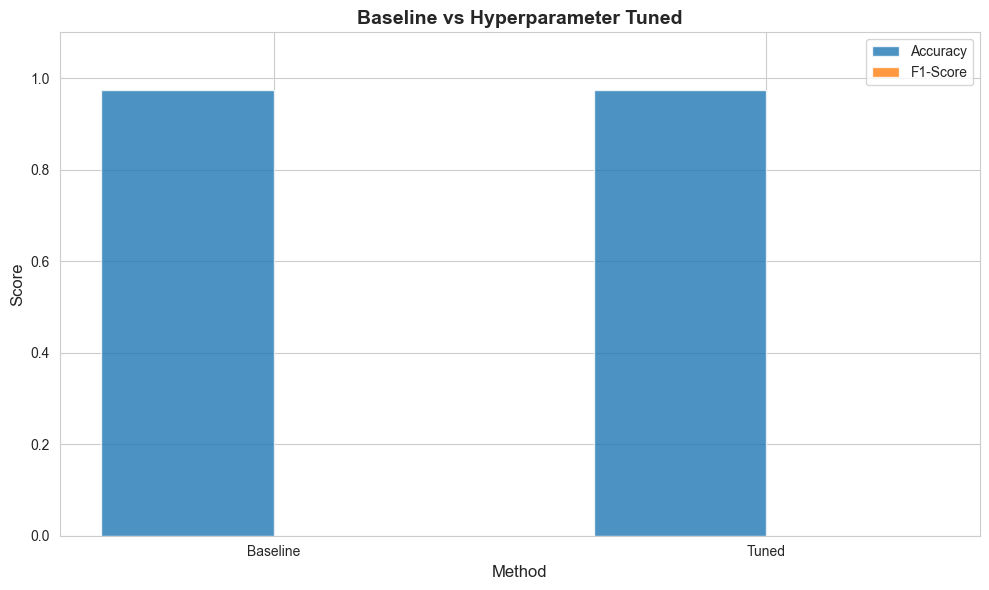

In [18]:
# Run with hyperparameter tuning
print("🔬 Running pipeline with hyperparameter tuning...\n")

results_tuned = run_pipeline(
    dataset=df,
    target_column='target',
    task_type='classification',
    feature_selection_enabled=False,
    hyperparameter_tuning_enabled=True,
    hyperparameter_params={'search_method': 'random'}  # Faster than grid
)

best_tuned = results_tuned['best_model']['name']
metrics_tuned = results_tuned['evaluation_results'][best_tuned]['metrics']
metrics_baseline = results['evaluation_results'][best_model_name]['metrics']

# Compare
comparison = pd.DataFrame({
    'Method': ['Baseline', 'Tuned'],
    'Model': [best_model_name, best_tuned],
    'Accuracy': [metrics_baseline.get('accuracy', 0), metrics_tuned.get('accuracy', 0)],
    'F1-Score': [metrics_baseline.get('f1_score', 0), metrics_tuned.get('f1_score', 0)]
})

print("\n📊 Baseline vs Tuned Comparison:")
print(comparison.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(comparison))
width = 0.35
ax.bar(x - width/2, comparison['Accuracy'], width, label='Accuracy', alpha=0.8)
ax.bar(x + width/2, comparison['F1-Score'], width, label='F1-Score', alpha=0.8)
ax.set_xlabel('Method', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Baseline vs Hyperparameter Tuned', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison['Method'])
ax.legend()
ax.set_ylim([0, 1.1])
plt.tight_layout()
plt.show()

## 12. Summary

This notebook demonstrated:
- ✅ Loading and visualizing image datasets
- ✅ Image preprocessing and normalization
- ✅ Multiple classifier training
- ✅ Performance evaluation and visualization
- ✅ Confusion matrix analysis
- ✅ Prediction visualization with correct/incorrect labels
- ✅ Pixel importance analysis
- ✅ Hyperparameter tuning comparison

**Next Steps:**
- Try with color images (CIFAR-10, custom datasets)
- Experiment with data augmentation
- Compare with deep learning models (CNNs)
- Test on real-world image classification tasks